ARJUN KC(8773456)

**Lab 3**

This lab provides insight into the concepts of Supervised Learning -Regression algorithms.

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set_style("whitegrid")

## Data Loading and Exploration of Data

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()  #reading the first 5 line daatset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()  #gives the describtive analysis of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.tail()  #reading last 5 line dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.columns  #these are the features of given dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
len(df.columns)  #total features of given dataset

31

In [8]:
df.shape  #guves the total shape of the dataset as a row and columns

(284807, 31)

In [9]:
df.info()  #we can see there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From dataset we got the information that feautre "Class" has two element which is 0 and 1 where 0 is considered as normal transaction, on the other hand 1 is considered as Fraudulaent Transaction

In [10]:
df["Class"].unique() #we can see there are two unique element of array ie 0 and 1

array([0, 1], dtype=int64)

In [11]:
df["Class"].nunique()  #there are total 2 unique array element

2

From this total transaction, lets see how many of them were normal transaction and fraudulent transaction

In [17]:
df["Class"].value_counts() #we can see that 284315 are normal transaction where as 492 are fraudulet transaction

0    284315
1       492
Name: Class, dtype: int64

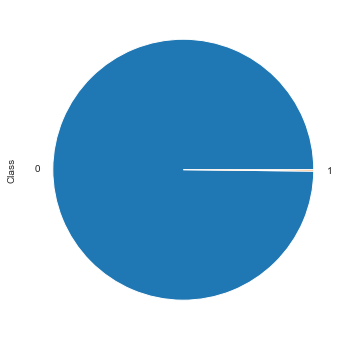

The number of normal transaction: 284315
The number of normal transaction: 492
Portion of the fraudulent is: 0.173


In [22]:
plt.figure(figsize=(8,6))
df["Class"].value_counts().plot(kind = "pie")
plt.show()
normal_trans = 284315
fraudulent_trans = 492
print("The number of normal transaction:",normal_trans)
print("The number of normal transaction:",fraudulent_trans)
print("Portion of the fraudulent is:", round(fraudulent_trans/normal_trans *100,3))

In [23]:
len(df)  #the number of total transaction

284807

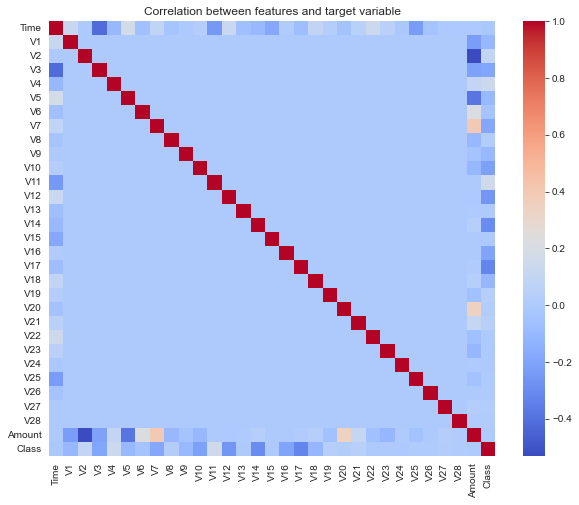

In [24]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),cmap ="coolwarm")
plt.title("Correlation between features and target variable")
plt.show()

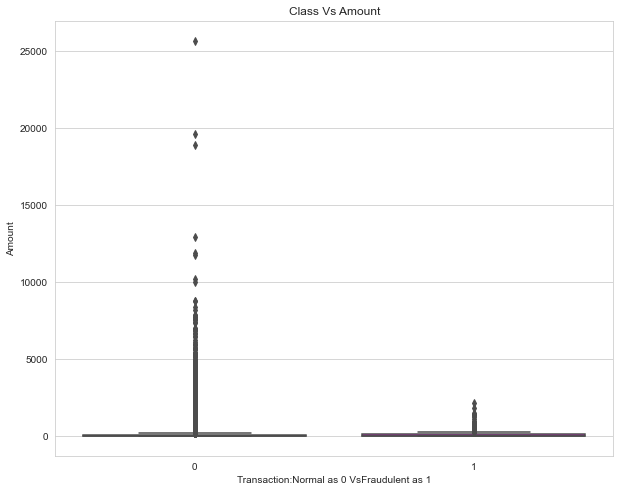

from here we can also see the outlier as well present in the Amount feature


In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x= df["Class"],y=df["Amount"],color= "magenta",data=df)
plt.title("Class Vs Amount")
plt.xlabel("Transaction:Normal as 0 VsFraudulent as 1")
plt.ylabel("Amount")
plt.show()
print("from here we can also see the outlier as well present in the Amount feature")

## Data Preprocessing

From dataset we can see all the features are standardize except features "Time" and "Amount"

Now we are standarizing the Time and Amount features

In [26]:
standrd = StandardScaler()

In [27]:
df["Stnd_Time"] = standrd.fit_transform(df["Time"].values.reshape(-1,1))

In [28]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Stnd_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.641931
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.641952
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.641974
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.641974


In [29]:
df["Stnd_Amount"] = standrd.fit_transform(df["Amount"].values.reshape(-1,1))

In [30]:
df.drop(['Time','Amount'], axis= 1,inplace = True)

In [31]:
df.shape

(284807, 31)

Lets check for the dublicate value

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.shape  #we can see that dublicate data has been removed

(283726, 31)

## Now splitting the data into train and test data

In [34]:
X = df.drop("Class",axis = 1)  #indenpendent or feature variable

In [35]:
y = df["Class"]  #dependent or target variable


splitting data into train and test size where train data is 70%  and test data is 30%

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

## Now Building the model using Logistic Regression

In [37]:
logmdl = LogisticRegression(max_iter=1000)

In [38]:
logmdl = logmdl.fit(X_train,y_train)

## Finally Evaluating the model performance

prediction on test data

In [39]:
y_pred = logmdl.predict(X_test)  #prediction on test data

Finding the accuracy

In [40]:
accu = accuracy_score(y_test,y_pred)
print(f'The accuracy of this model for Fraud detection is {round(accu *100,3)}')

The accuracy of this model for Fraud detection is 99.917


Using confusion metris

In [41]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[84973,    11],
       [   60,    74]], dtype=int64)

from confusion matrxi we can conclude that, 

84973 elements were predicted correctly for True Negative class

74 elements were predicted correclty for True Positive class

11 elements were predicted incorreclty for  false positive class

60 elements were predicted incorreclty for flase negative class

Classification Report

In [42]:
cal_reprt = classification_report(y_test,y_pred)

In [43]:
print(cal_reprt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.55      0.68       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



From classification report we can infer that,

Precision:

for class 0 and 1 which is normal and fraudulent transaction 1(100%) and 0.87(87%) which means that model perform very well and correct for class 0 where as 87% for class 1

Recall:

For class 0, the recall is 100% ie the model identified  the instances prefectly where for class 1, the recall is 55% ie the model missed 45% to identify the instances.

F1-score:

for class 0, F1-score is 100% which means that there is perfect model balance between precision and recall
for class 1, F1-score is 68% which means that there is some trade-off between precision and recall.


.


**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set_style("whitegrid")

## Data Loading and Exploration of Data

In [79]:
df = pd.read_csv("insurance.csv")

In [80]:
df.head() #reading the first 5 line daatset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [82]:
df.describe() #gives the describtive analysis of the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [83]:
df.tail()  #reading last 5 line dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [84]:
df.columns  #these are the features of given dataset

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [85]:
len(df.columns)

7

In [86]:
df.shape  #guves the total shape of the dataset as a row and columns

(1338, 7)

In [87]:
df.info()  #we can see there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [88]:
df.isnull().sum() #we can see there is no missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

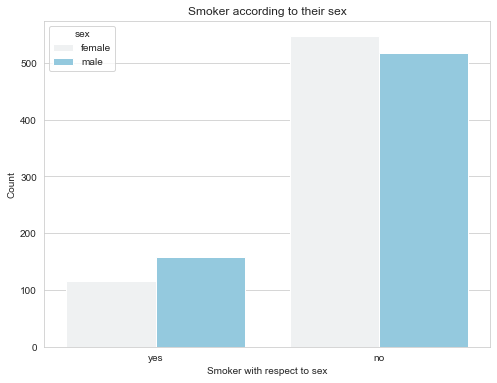

From this countplot we can see that number of male and female who dont smoke is high in ratio


In [89]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["smoker"],hue = "sex",color= "skyblue",data=df)
plt.title("Smoker according to their sex")
plt.xlabel("Smoker with respect to sex")
plt.ylabel("Count")
plt.show()
print("From this countplot we can see that number of male and female who dont smoke is high in ratio")

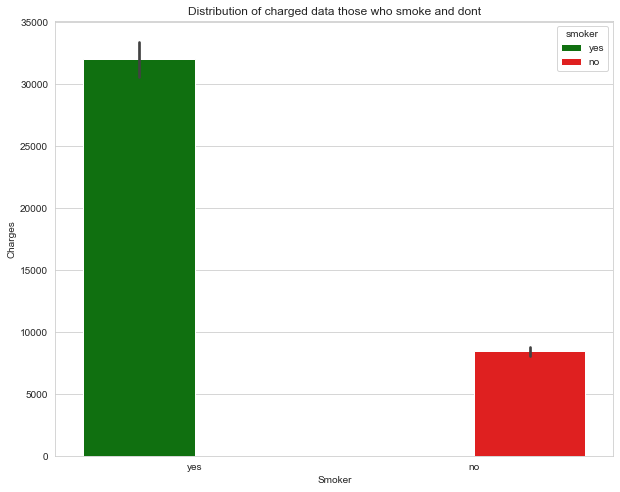

In [90]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["smoker"],y=df["charges"],hue = "smoker",palette= ["green","red"],data=df)
plt.title("Distribution of charged data those who smoke and dont")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

<Figure size 720x576 with 0 Axes>

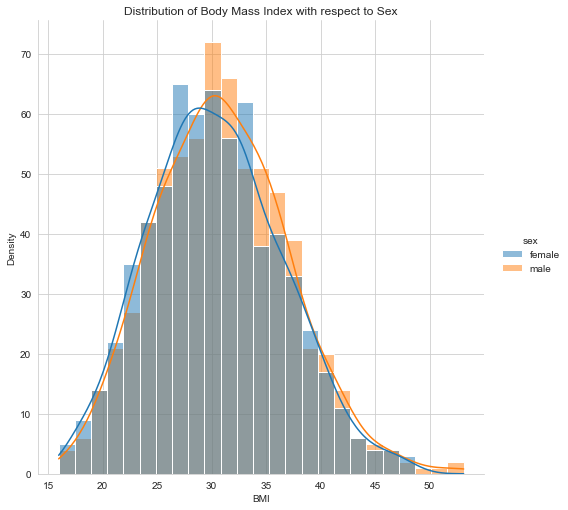

we can see that the distribution is normal and has no skwness


In [91]:
plt.figure(figsize=(10,8))
sns.displot(data = df,x=df["bmi"],hue= df["sex"],kde=True,height=7)
plt.title("Distribution of Body Mass Index with respect to Sex")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()
print("we can see that the distribution is normal and has no skwness")

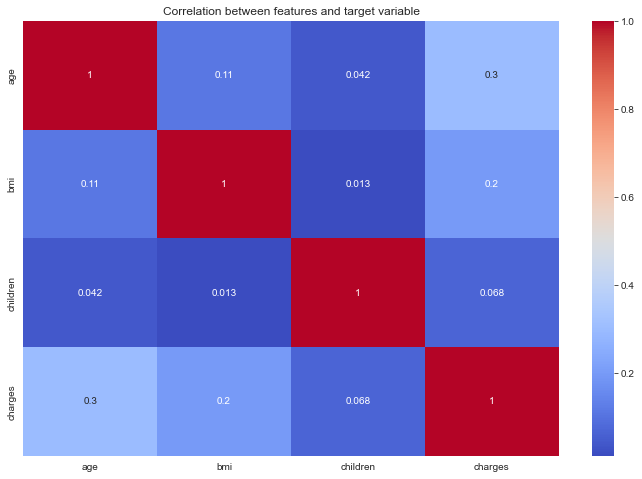

In [92]:
plt.figure(figsize =(12,8))
sns.heatmap(df.corr(),cmap ="coolwarm",annot = True)
plt.title("Correlation between features and target variable")
plt.show()

## Data Preprocessing

In [93]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


from data preprocessing we can folow different technique like one hot encoding or label encoder which help to convert in numeric data

I am using one hot encoding technique

In [94]:
#from sklearn.preprocessing import LabelEncoder
#lab = LabelEncoder()
#lab.fit(df["region"].drop_duplicates())
#df["region"] = lab.transform(df["region"])
#df

In [95]:
#lab = LabelEncoder()
#lab.fit(df["sex"].drop_duplicates())
#df["sex"] = lab.transform(df["sex"])
#df

In [96]:
#lab = LabelEncoder()
#lab.fit(df["smoker"].drop_duplicates())
#df["smoker"] = lab.transform(df["smoker"])
#df

Since there is three categorical columns ie sex, smoker and region so convert them to numerical by using one-hot encoding

In [97]:
df = pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)

In [98]:
df  # we finally create all the numeric data using one hot encoding

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Now splitting the data into train and test data

In [99]:
X = df.drop("charges",axis =1 )
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [100]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

splitting data into train and test size where train data is 70%  and test data is 30%

## Now Building the model using Linear Regression

In [102]:
lnr = LinearRegression()

In [103]:
lnr = lnr.fit(X_train,y_train)

## Finally Evaluating the model performance

In [104]:
y_pred_test = lnr.predict(X_test)  #prediction on test data

In [105]:
y_pred_train = lnr.predict(X_train)  #prediction on train data

Calculating the R square for test and train data

In [107]:
R_square_test = r2_score(y_test,y_pred_test)

In [108]:
print(f'The R-square score using linear regression for test data is {round(R_square_test*100,2)}%')

The R-square score using linear regression for test data is 76.96%


Root Square score help us to understand that how well the model is fitted into the data. R square is range from 0 t0 1 where 1 is considered as good model, and high the value of R-square greater the predicting model performance

Here we got R sqaure for test data as 76% which is not that bad but still we need to do perform feature engineering technique in order to imporve the value of R square


In [109]:
R_square_train = r2_score(y_train,y_pred_train)
print(f'The R-square score using linear regression for test data is {round(R_square_train*100,2)}%')

The R-square score using linear regression for test data is 74.24%


Plot for training data

In [110]:
tran_df = pd.DataFrame({"True Charges":y_train,"Predict Charge":y_pred_train})
tst_df = pd.DataFrame({"True Charges":y_test,"Predict Charge":y_pred_test})

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


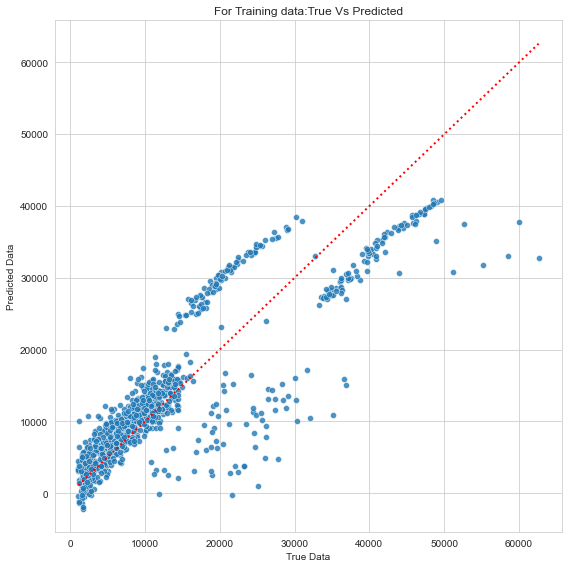

In [111]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = tran_df,x= "True Charges",y ="Predict Charge",alpha=0.8)
sns.lineplot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red",linestyle ="dotted",lw = 2)
plt.title("For Training data:True Vs Predicted")
plt.xlabel("True Data")
plt.ylabel("Predicted Data")
plt.tight_layout()
plt.show()

Plot for testing data

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


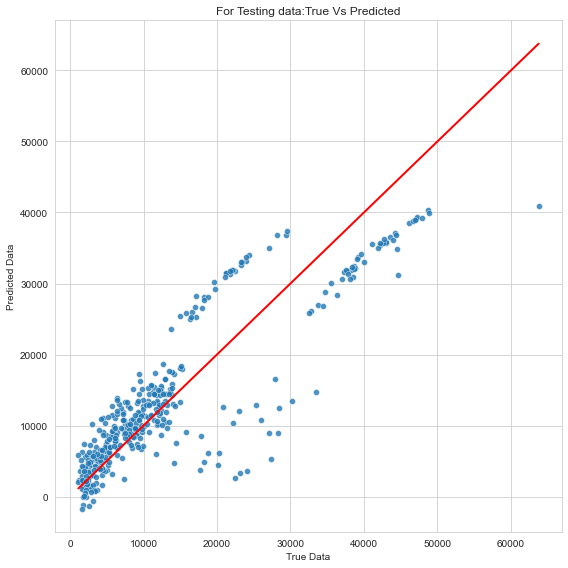

In [112]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = tst_df,x= "True Charges",y ="Predict Charge",alpha=0.8)
sns.lineplot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = "red",linestyle ="solid",lw = 2)
plt.title("For Testing data:True Vs Predicted")
plt.xlabel("True Data")
plt.ylabel("Predicted Data")
plt.tight_layout()
plt.show()

From above scatter plot for traing and testing data, what we can conclude is, model performed well and data are well fitted. We can also see the R-square value which has 76.96% on test data and 74.24% on train data, thus have smiliar value or no significant difference between them and from that what we can also conclude is there isnot much issue of over-fitting or under-fitting and can be considered as good model.